# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from keras.layers import Dropout, MaxPooling2D, Conv2D, BatchNormalization
from keras import datasets, layers, models
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import random


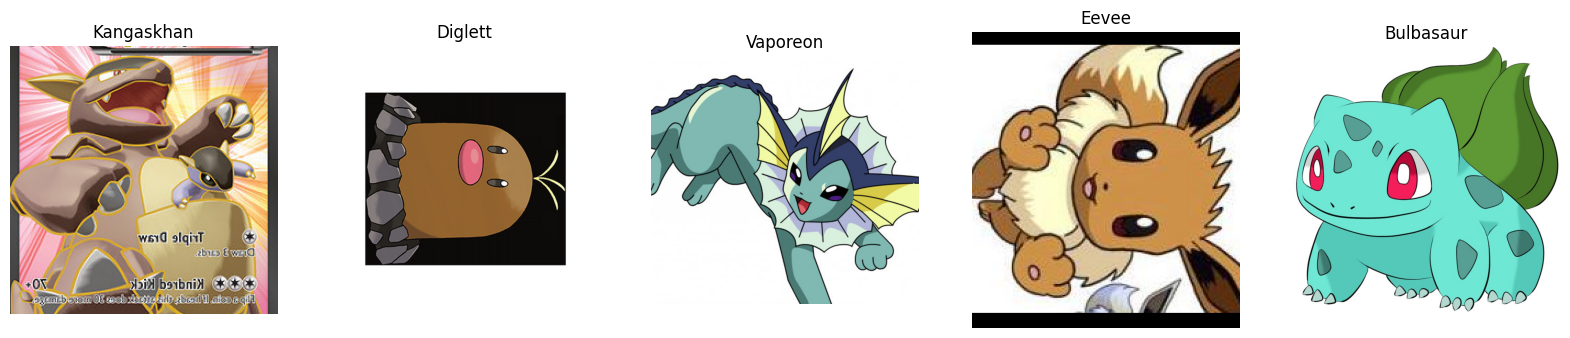

In [3]:
training_directory = 'data/training_set'
testing_directory = 'data/testing_set'


poke_list = os.listdir("data/images")
poke_dict = {string: index for index, string in enumerate(poke_list)}

fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [4]:
# can speed up our compilation by pre-processing our images at once
def resize_image(image_path):
    with Image.open(image_path) as i:
        if i.mode != 'RGB':
            i = i.convert('RGB')
        i = i.resize((64, 64))
        return np.array(i)


#loop through creating dataset that contains [label, path_to_image]
dataset = []
for poke_folder in os.listdir(training_directory):
    for poke_img in os.listdir(training_directory + '/' + poke_folder):
        img = resize_image(training_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])

# place training data into x and labels into y
labels = np.array([poke_dict[x[0]] for x in dataset])
images = np.array([x[1] for x in dataset])

images = images / 255.0

# Flatten the image arrays for the MLP input
images = images.reshape(images.shape[0], -1)
# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20)

x_train = x_train.reshape(x_train.shape[0], 64, 64, 3)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 3)

print(f"Number of training data: {len(y_train)}")
print(f"Number of testing data: {len(y_test)}")



Number of training data: 21700
Number of testing data: 5426


In [5]:



model = models.Sequential()
# model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
# model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(Conv2D(256, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(151, activation='softmax'))

model.summary()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        102464    
                                                        

In [6]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, 
                    batch_size= 64,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)


Epoch 1/20


c:\Users\scran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


340/340 [==============================] - 567s 2s/step - loss: 4.6691 - accuracy: 0.0185 - val_loss: 4.2784 - val_accuracy: 0.0350
Epoch 2/20
340/340 [==============================] - 548s 2s/step - loss: 4.0256 - accuracy: 0.0591 - val_loss: 4.1780 - val_accuracy: 0.0562
Epoch 3/20
340/340 [==============================] - 588s 2s/step - loss: 3.6443 - accuracy: 0.1038 - val_loss: 3.7063 - val_accuracy: 0.1150
Epoch 4/20
340/340 [==============================] - 562s 2s/step - loss: 3.3291 - accuracy: 0.1653 - val_loss: 3.8918 - val_accuracy: 0.1106
Epoch 5/20
340/340 [==============================] - 550s 2s/step - loss: 3.0218 - accuracy: 0.2250 - val_loss: 3.2012 - val_accuracy: 0.2066
Epoch 6/20
340/340 [==============================] - 554s 2s/step - loss: 2.7329 - accuracy: 0.2863 - val_loss: 2.8477 - val_accuracy: 0.2781
Epoch 7/20
340/340 [==============================] - 552s 2s/step - loss: 2.4784 - accuracy: 0.3447 - val_loss: 3.0920 - val_accuracy: 0.2431
Epoch 8/20

170/170 [==============================] - 36s 210ms/step


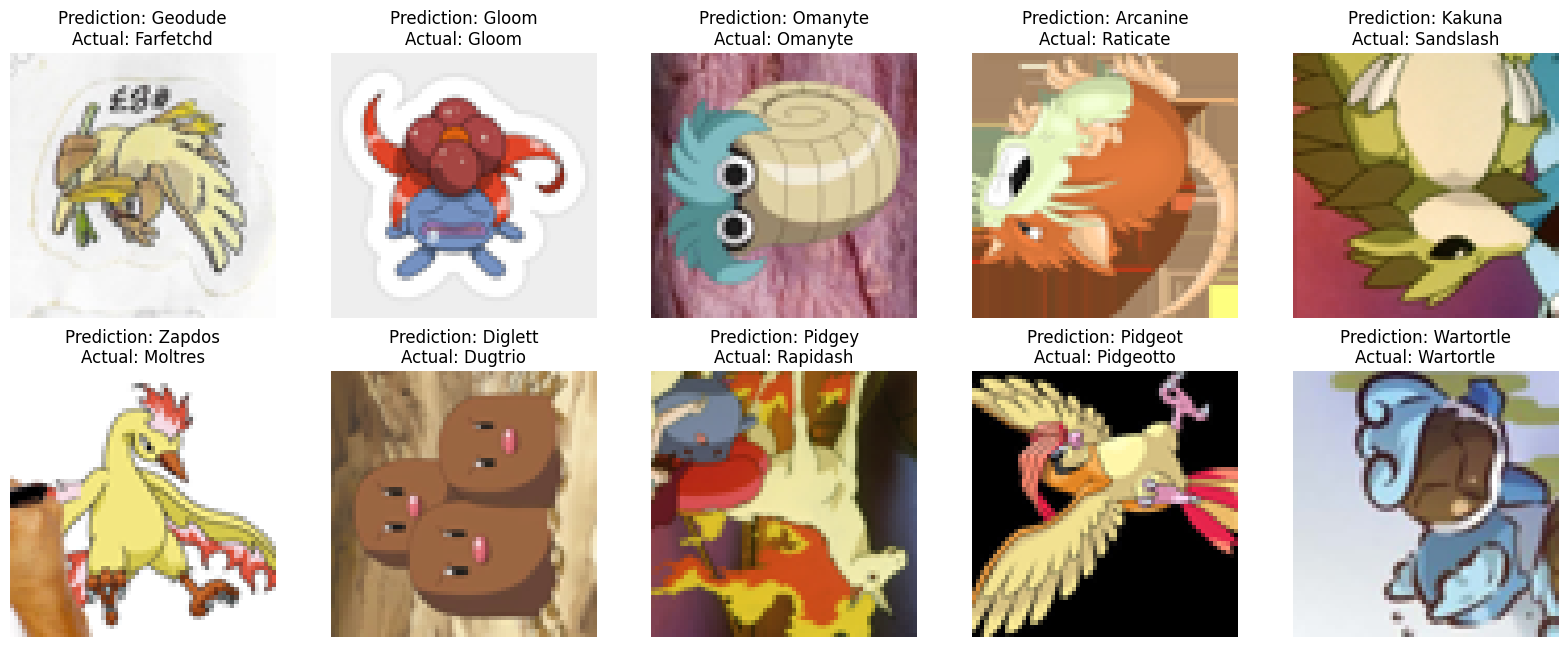

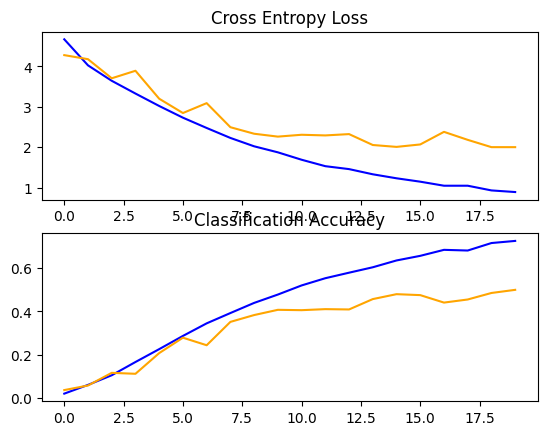

Accuracy for class: Abra         is 53.3 %
Accuracy for class: Aerodactyl   is 25.8 %
Accuracy for class: Alakazam     is 50.0 %
Accuracy for class: Alolan Sandslash is 46.9 %
Accuracy for class: Arbok        is 76.5 %
Accuracy for class: Arcanine     is 9.4 %
Accuracy for class: Articuno     is 34.2 %
Accuracy for class: Beedrill     is 70.4 %
Accuracy for class: Bellsprout   is 88.2 %
Accuracy for class: Blastoise    is 50.0 %
Accuracy for class: Bulbasaur    is 71.4 %
Accuracy for class: Butterfree   is 70.0 %
Accuracy for class: Caterpie     is 55.6 %
Accuracy for class: Chansey      is 50.0 %
Accuracy for class: Charizard    is 40.7 %
Accuracy for class: Charmander   is 64.9 %
Accuracy for class: Charmeleon   is 56.0 %
Accuracy for class: Clefable     is 54.5 %
Accuracy for class: Clefairy     is 54.8 %
Accuracy for class: Cloyster     is 37.5 %
Accuracy for class: Cubone       is 31.4 %
Accuracy for class: Dewgong      is 16.7 %
Accuracy for class: Diglett      is 61.3 %
Accuracy

In [7]:
import sys

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # plt.savefig(filename + '_plot.png')
    # plt.close()




# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in poke_list}
total_pred = {classname: 0 for classname in poke_list}

# Get model predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the  first 10 images in 2 rows test image and predicted label using Matplotlib, state the prediction vs actual name
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)

    plt.imshow(x_test[i], cmap=plt.cm.binary)    
    plt.title(f"Prediction: {poke_list[predicted_labels[i]]}\nActual: {poke_list[y_test[i]]}")
    
    plt.axis("off")

plt.show()

summarize_diagnostics(history)
plt.show()

# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_class = poke_list[true_label]
    if true_label == predicted_label:
        correct_pred[true_class] += 1
    total_pred[true_class] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    else:
        accuracy = 0
    print(f'Accuracy for class: {classname:12s} is {accuracy:.1f} %')

# Print overall accuracy
overall_accuracy = 100 * (sum(correct_pred.values()) / sum(total_pred.values()))
print(f'Overall accuracy is {overall_accuracy:.1f} %')

